In [1]:
# Let's take a look at Data Reduction and Science Data
# TTE data analysis
from gbm.data import TTE

/home/lonewolf/mambaforge/lib/python3.10/site-packages/gbm/plot/lal_post_subs.py:184: UserWarning: Basemap not installed. Some functionality not available.
  warnings.warn('Basemap not installed. Some functionality not available.')


In [3]:
tte = TTE.open('glg_tte_n2_bn220921462_v00.fit')

In [4]:
# Data stored in the TTE object is an event list,
# contains a list of Time Tagged accounts associated with the Energy channels
# It is unbinned in Time but it is binned in Energy
tte.data

In [5]:
# To display the lightcurve, we have to bin the data
# Import files useful for unbinned data
# Bin By Time will bin the data up by specified time resolution
# & A time reference point from which we have to begin the binning
from gbm.binning.unbinned import bin_by_time

In [6]:
# Convert tte data to pha data
# Time resolution of 1 s and reference time of 0.0 i.e. referenced to Trig Time
phaii = tte.to_phaii(bin_by_time, 1.0, time_ref = 0.0)

In [7]:
# Plotting Lightcurve
lc = phaii.to_lightcurve(time_range = (-100.0, 100.0), energy_range = (100.0, 300000.0))

In [8]:
from gbm.plot import Lightcurve, Spectrum
import matplotlib.pyplot as plt

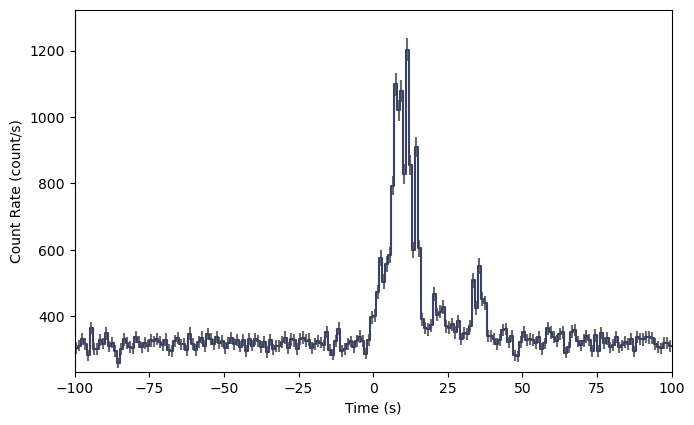

In [9]:
# Lightcurve plot
# Lightcurve from the TTE data bins to 1 s resolution
lcplot = Lightcurve(data = lc)
plt.show()

In [10]:
# Selection of the time range in the plot where the photon counts are shown explicitly
lc_select = lc.slice(-1.0, 20.0)

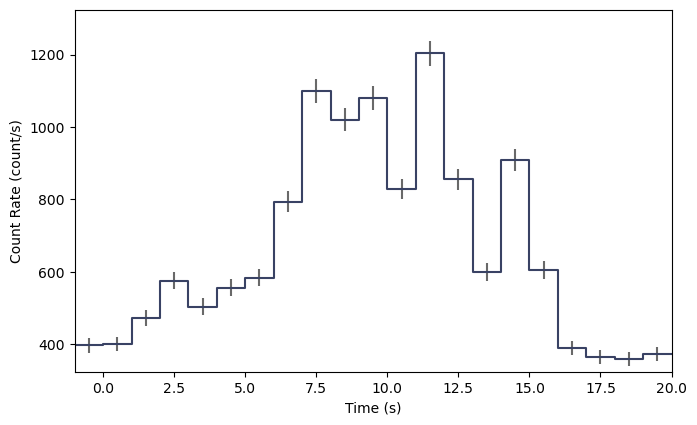

In [11]:
# Add time range selection in the lightcurve
lcplot.add_selection(lc_select)
lcplot = Lightcurve(data = lc_select)
plt.show()

In [12]:
# Plotting Spectrum
spec = phaii.to_spectrum(time_range = (0.0, 40.0))

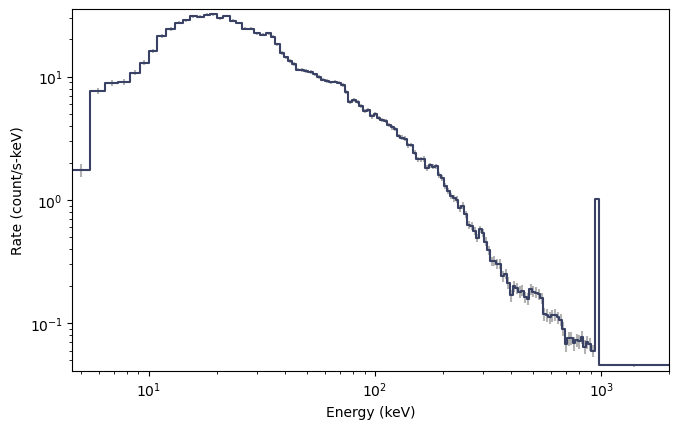

In [13]:
specplot = Spectrum(data = spec)
plt.show()

In [14]:
# Spectrum selection by slicing the spectrum in the energy range
spec_select = spec.slice(100.0, 300.0)

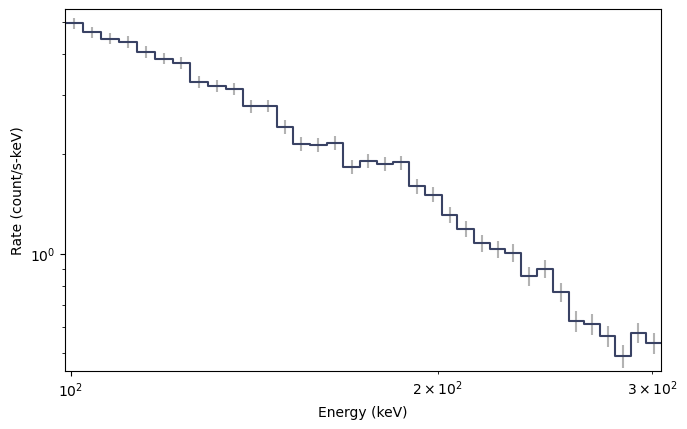

In [15]:
specplot.add_selection(spec_select)
specplot = Spectrum(data = spec_select)
plt.show()

In [16]:
# Fitting background for our Lightcurve
# Using Background Fitter and Polynomial Background Model
from gbm.background import BackgroundFitter
from gbm.background.binned import Polynomial

In [17]:
# Fitter will operate in both unbinned and binned data
# Using Fitter for the prebinned data
backfitter = BackgroundFitter.from_phaii(phaii, Polynomial, [(-30.0, -2.0), (50.0, 100.0)])

In [18]:
# Using I order Polynomial
backfitter.fit(order=1)

In [19]:
# Interpolate the background model over the source region
# Plotting the background model on the lightcurve
bkgd_model = backfitter.interpolate_bins(lc.lo_edges, lc.hi_edges)

In [20]:
bkgd_model

In [22]:
# Integrating the Background model over the same Energy range used in the Lightcurve
lc_bkgd = bkgd_model.integrate_energy(100.0, 300000.0)

In [23]:
# Adding background model to lightcurve plot
lcplot.set_background(lc_bkgd)

In [24]:
# Adding background model to Spectrum plot
spec_bkgd = bkgd_model.integrate_time(-1.0, 20.0)
specplot.set_background(spec_bkgd)

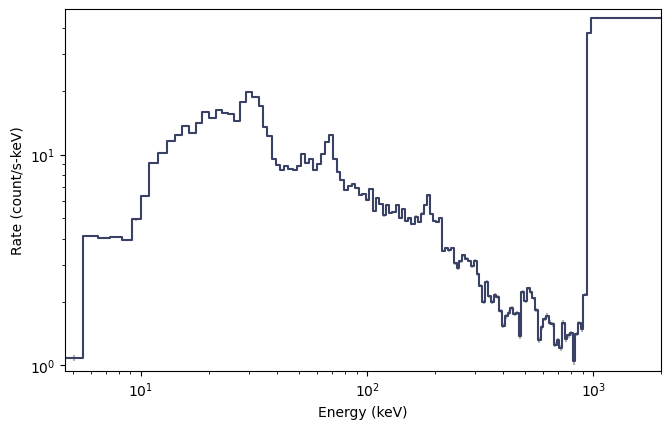

In [25]:
# Plotting Background Spectrum
specplot.add_selection(spec_bkgd)
specplot = Spectrum(data = spec_bkgd)